Copyright (c) 2025 Quan-feng WU <wuquanfeng@ihep.ac.cn>

This notebook is released under the [MIT License](https://opensource.org/licenses/MIT).

# Preliminaries

In [1]:
using CairoMakie
using DataInterpolations
using JLD2
using LaTeXStrings

In [2]:
set_theme!(theme_latexfonts())

In [3]:
include("tool_script-directories.jl");
include("tool_script-geomspace.jl");

# Load Data

In [4]:
up_data = load(joinpath(output_data_directory, "table_up.jld2"));
gluon_data = load(joinpath(output_data_directory, "table_gluon.jld2"));

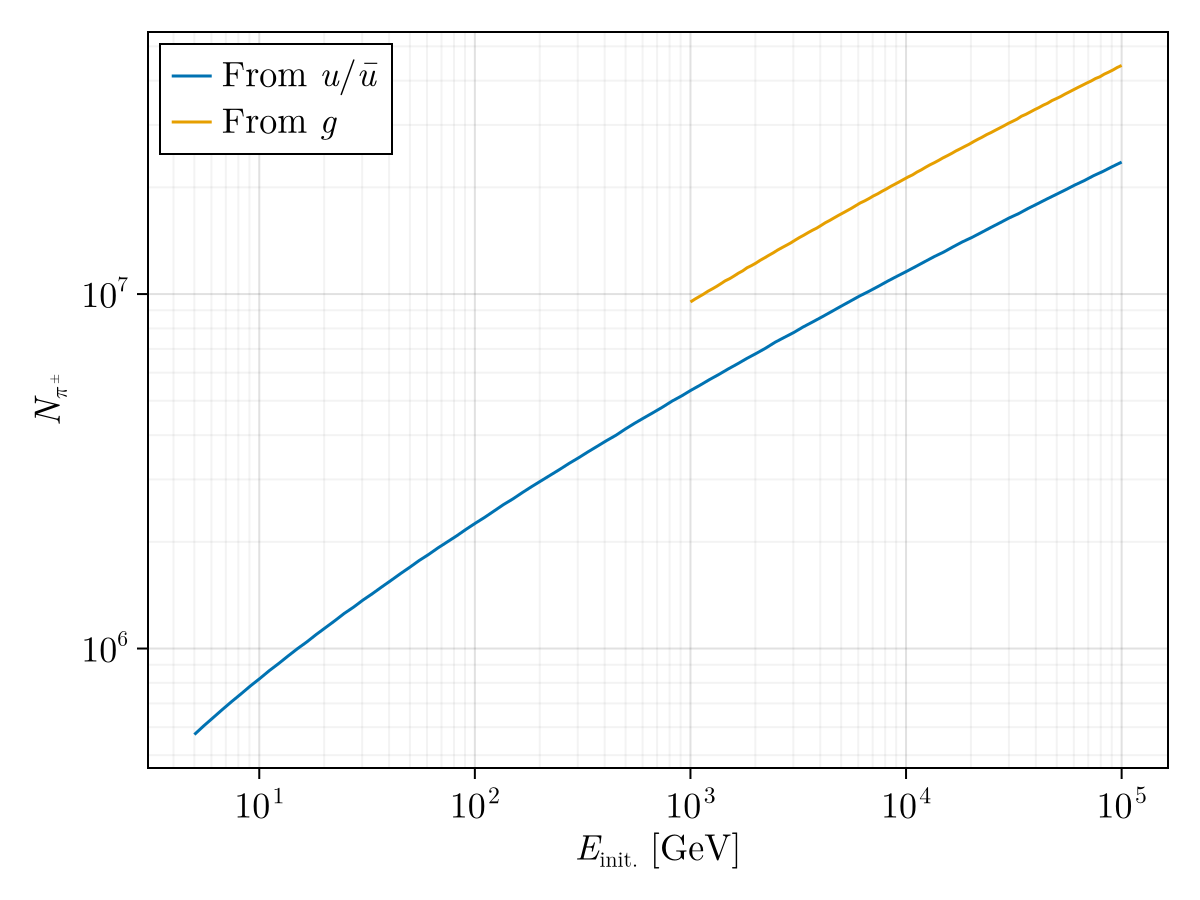

In [5]:
number_pion_from_up = (vec ∘ sum)(up_data["pipm"], dims=2)
number_pion_from_gluon = (vec ∘ sum)(gluon_data["pipm"], dims=2)

figure = Figure(fontsize=18)
axis = Axis(figure[1, 1],
    xlabel=L"E_\mathrm{init.} ~ [\mathrm{GeV}]",
    ylabel=L"N_{\pi^\pm}",
    xscale=log10, yscale=log10,
    xminorgridvisible=true, yminorgridvisible=true,
    xminorticks=IntervalsBetween(9),
    yminorticks=IntervalsBetween(9),
    yticks=(exp10.(1:10), [L"10^{%$ii}" for ii ∈ 1:10]),
)

lines!(axis, up_data["E [GeV] (initial)"], number_pion_from_up; label=L"From $u / \bar{u}$")
lines!(axis, gluon_data["E [GeV] (initial)"], number_pion_from_gluon; label=L"From $g$")
axislegend(axis; position=:lt)
# save(joinpath(plot_directory, "number_of_pipm.pdf"), figure)
figure